# Imports

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
    
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import tree

from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score

# Understanding Data

In [3]:
# Importing the dataset
df = pd.read_csv('telco_churn.csv')
df.head()


#this you can cancel
# df.drop(df[df['TotalCharges'] == " "].index, inplace=True)
# #since it's a numerical feature, we need to convert it to a float dtype
# df['TotalCharges'] = df['TotalCharges'].astype(float)
# #we also want to drop the customerID column, which we won't need for our analysis
# df.drop(['customerID'], axis=1, inplace=True)
# df['OnlineServices'] = df['OnlineSecurity'] +  df['OnlineBackup']
# df['OnlineServices'] = df['OnlineServices'].replace({'NoNo': 'No Online Service',
#                                                        'YesNo': 'Only Security',
#                                                        'NoYes': 'Only Backup',
#                                                        'YesYes': 'Both Services',
#                                                        'No internet serviceNo internet service':'No internet service'})
# df.drop(['OnlineSecurity', 'OnlineBackup'], axis=1, inplace=True)
# df['StreamingServices'] = df['StreamingTV'] +  df['StreamingMovies']
# df['StreamingServices'] = df['StreamingServices'].replace({'NoNo': 'No Streaming Service', 
#                                                          'YesNo': 'Only TV', 
#                                                          'NoYes': 'Only Movies', 
#                                                          'YesYes': 'Both Services',
#                                                          'No internet serviceNo internet service':'No internet service'})
# df.drop(['StreamingTV', 'StreamingMovies'], axis=1, inplace=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Variable Segmentation**
- Customer --> ['customer_id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'] 
- Services --> ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity, 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
- Account --> ['Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

**Target Variable**
- Churn --> categorical variable, can have as values 'Yes' or 'No'

In [4]:
#gives us us shape, dtypes, and also null values of our data 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that we have no null values in our data, but upon closer inspection, we can see that the TotalCharges column has null values represented as a blank space

In [112]:
#find null values
df[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are only 11 null values, so dropping the rows won't significantly affect the performance

In [113]:
df.drop(df[df['TotalCharges'] == " "].index, inplace=True)
#since it's a numerical feature, we need to convert it to a float dtype
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [114]:
#we also want to drop the customerID column, which we won't need for our analysis
df.drop(['customerID'], axis=1, inplace=True)

# EDA

In [115]:
#first, we want to look at numerical features
num_feat = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_feat].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


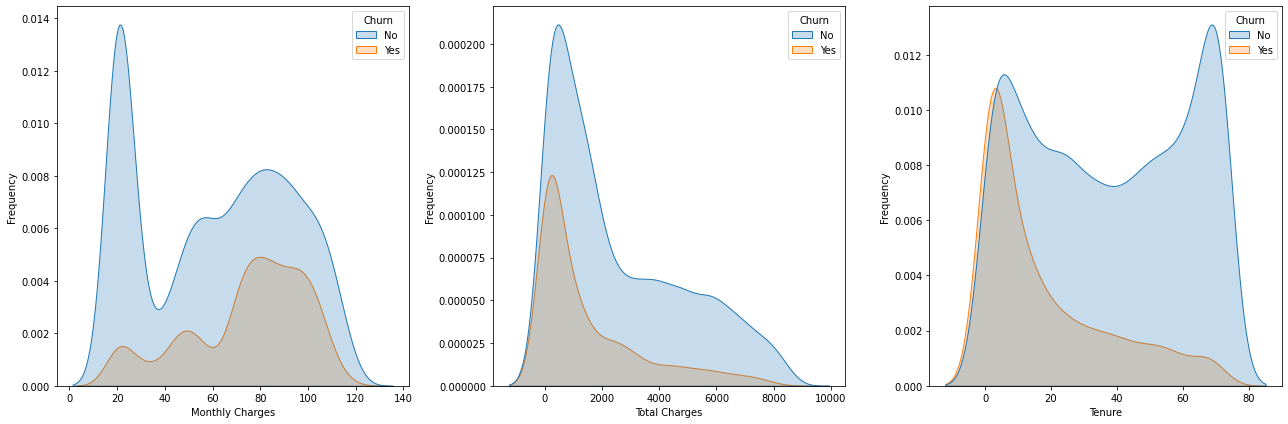

In [116]:
#plotting distributions of numerical variables divided by churn 
fig, ax  = plt.subplots(1, 3, figsize=(18, 6))

ax0 = sns.kdeplot(x = df['MonthlyCharges'],  hue= df['Churn'], ax= ax[0],  fill=True)
ax0.set(xlabel= 'Monthly Charges', ylabel= 'Frequency')

ax1 = sns.kdeplot(x = df['TotalCharges'], hue= df['Churn'], ax= ax[1],   fill=True)
ax1.set(xlabel= 'Total Charges', ylabel= 'Frequency')

ax2 = sns.kdeplot(x = df['tenure'], hue= df['Churn'], ax= ax[2],  fill=True)
ax2.set(xlabel= 'Tenure', ylabel= 'Frequency')

plt.tight_layout()
plt.show()

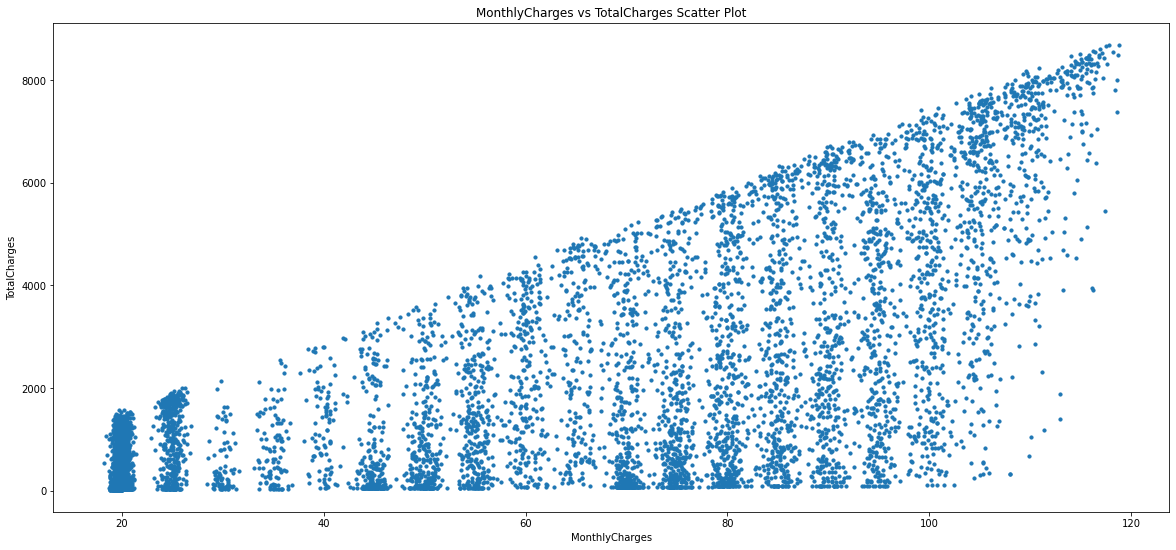

In [117]:
#it'd be interesting to see how monthly charges compare to total charges
plt.figure(figsize=(20,9))
plt.scatter(x = df['MonthlyCharges'],y=df['TotalCharges'],s=10)
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.title('MonthlyCharges vs TotalCharges Scatter Plot')
plt.show()

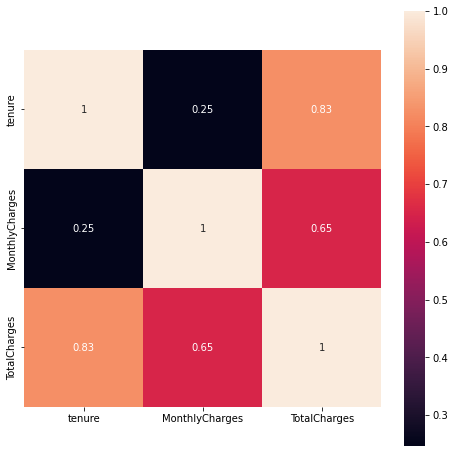

In [118]:
#we can visually see there is a high correlation. let's see it quantitatively between all variables
plt.figure(figsize=(8, 8))
sns.heatmap(df[num_feat].corr(), annot = True, square=True)
plt.show()

In [119]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

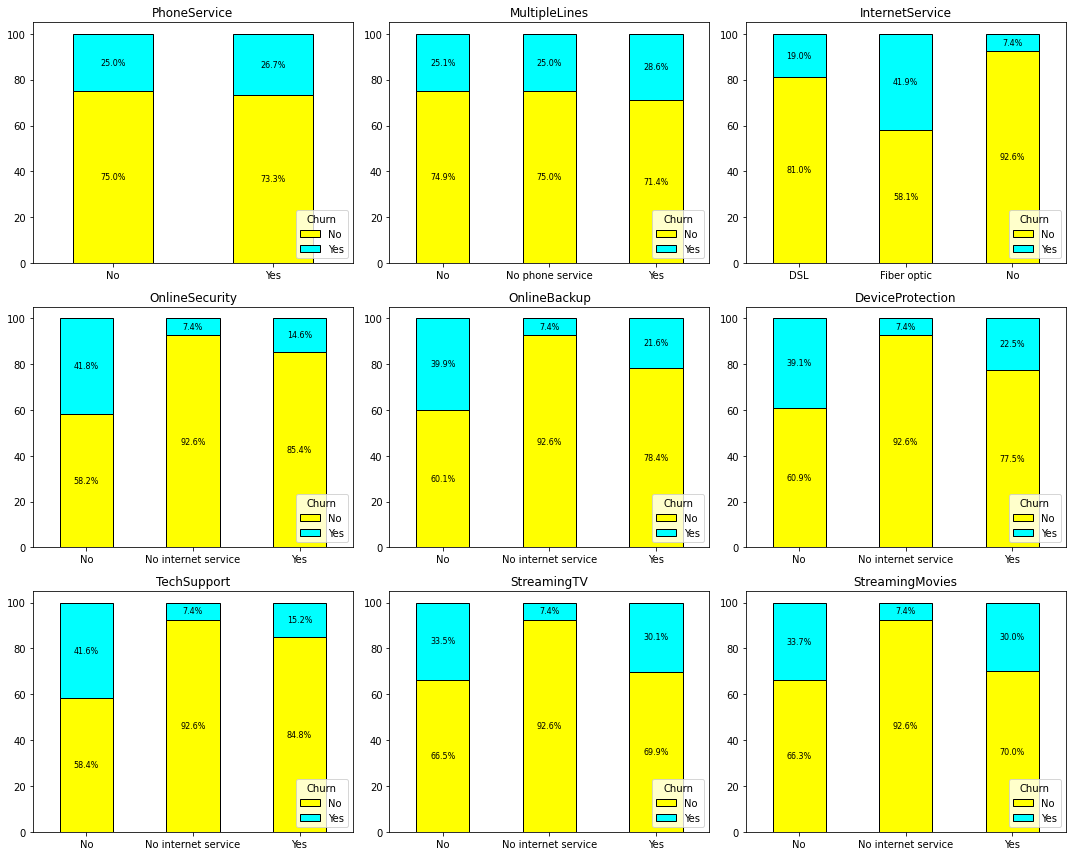

In [120]:
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services[:3]):
    contract_churn_percent = df.groupby([item, 'Churn']).size() / df.groupby(item).size() * 100
    pivot_df = contract_churn_percent.unstack()
    ax = pivot_df.plot(kind='bar', stacked=True, color=['yellow', 'cyan'], edgecolor='black', ax=axes[0,i], rot=0)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
        ax.set_title(item)
        ax.set_xlabel('')
        ax.legend(title='Churn',loc='lower right')
for i, item in enumerate(services[3:6]):
    contract_churn_percent = df.groupby([item, 'Churn']).size() / df.groupby(item).size() * 100
    pivot_df = contract_churn_percent.unstack()
    ax = pivot_df.plot(kind='bar', stacked=True, color=['yellow', 'cyan'], edgecolor='black', ax=axes[1,i], rot=0)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
        ax.set_title(item)
        ax.set_xlabel('')
        ax.legend(title='Churn',loc='lower right')
for i, item in enumerate(services[6:9]):
    contract_churn_percent = df.groupby([item, 'Churn']).size() / df.groupby(item).size() * 100
    pivot_df = contract_churn_percent.unstack()
    ax = pivot_df.plot(kind='bar', stacked=True, color=['yellow', 'cyan'], edgecolor='black', ax=axes[2,i], rot=0)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
        ax.set_title(item)
        ax.set_xlabel('')
        ax.legend(title='Churn',loc='lower right')

plt.tight_layout()
plt.show()

In [121]:
#from the barplots we can see that online sec and online back have very similar percentages,
#and since they relate to services that would usually be bought together it makes sense to 
#merge them into one variable
df['OnlineServices'] = df['OnlineSecurity'] +  df['OnlineBackup']
df['OnlineServices'] = df['OnlineServices'].replace({'NoNo': 'No Online Service',
                                                       'YesNo': 'Only Security',
                                                       'NoYes': 'Only Backup',
                                                       'YesYes': 'Both Services',
                                                       'No internet serviceNo internet service':'No internet service'})
df.drop(['OnlineSecurity', 'OnlineBackup'], axis=1, inplace=True)

In [122]:
#same thing we can do with StreamingTV and StreamingMovies
df['StreamingServices'] = df['StreamingTV'] +  df['StreamingMovies']
df['StreamingServices'] = df['StreamingServices'].replace({'NoNo': 'No Streaming Service', 
                                                         'YesNo': 'Only TV', 
                                                         'NoYes': 'Only Movies', 
                                                         'YesYes': 'Both Services',
                                                         'No internet serviceNo internet service':'No internet service'})
df.drop(['StreamingTV', 'StreamingMovies'], axis=1, inplace=True)

In [123]:
# now let's look at demographic categorical variables
demographic = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

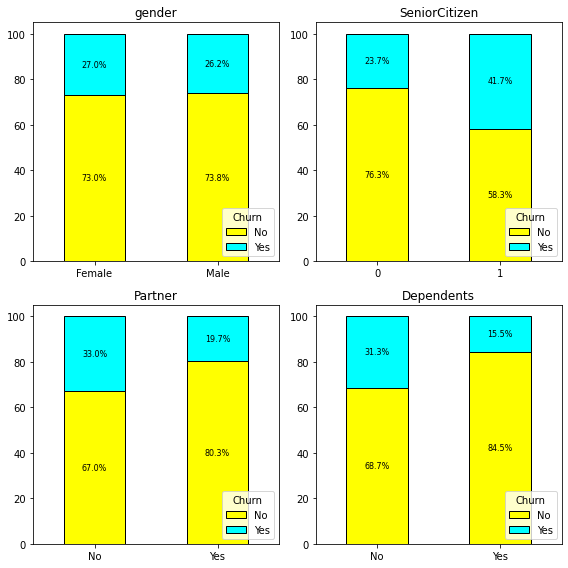

In [124]:
fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (8,8))
for i, item in enumerate(demographic[:2]):
    contract_churn_percent = df.groupby([item, 'Churn']).size() / df.groupby(item).size() * 100
    pivot_df = contract_churn_percent.unstack()
    ax = pivot_df.plot(kind='bar', stacked=True, color=['yellow', 'cyan'], edgecolor='black', ax=axes[0,i], rot=0)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
        ax.set_title(item)
        ax.set_xlabel('')
        ax.legend(title='Churn',loc='lower right')
for i, item in enumerate(demographic[2:4]):
    contract_churn_percent = df.groupby([item, 'Churn']).size() / df.groupby(item).size() * 100
    pivot_df = contract_churn_percent.unstack()
    ax = pivot_df.plot(kind='bar', stacked=True, color=['yellow', 'cyan'], edgecolor='black', ax=axes[1,i], rot=0)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
        ax.set_title(item)
        ax.set_xlabel('')
        ax.legend(title='Churn',loc='lower right')
plt.tight_layout()
plt.show()

In [125]:
# now let's look at demographic categorical variables
payment = ['Contract', 'PaperlessBilling', 'PaymentMethod']

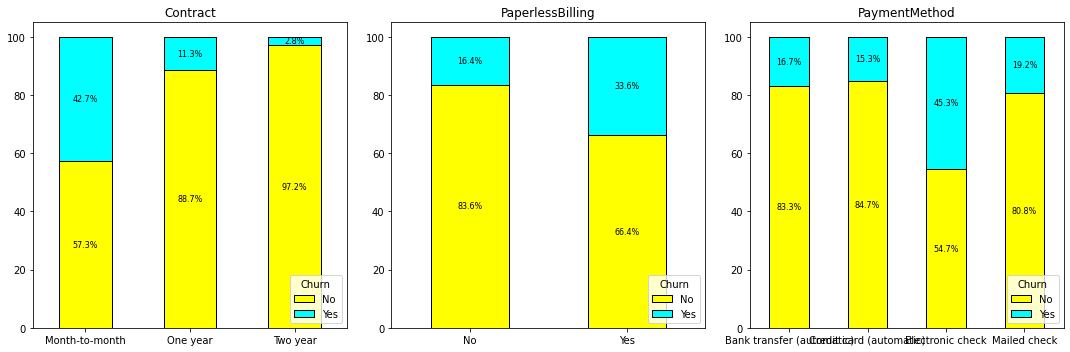

In [126]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i, item in enumerate(payment):
    contract_churn_percent = df.groupby([item, 'Churn']).size() / df.groupby(item).size() * 100
    pivot_df = contract_churn_percent.unstack()
    ax = pivot_df.plot(kind='bar', stacked=True, color=['yellow', 'cyan'], edgecolor='black', ax=axes[i], rot=0)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
        ax.set_title(item)
        ax.set_xlabel('')
        ax.legend(title='Churn',loc='lower right')

plt.tight_layout()
plt.show()

In [207]:
unique_values = {column: list(df[column].unique()) for column in df.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

gender : ['Female', 'Male']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No phone service', 'No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
DeviceProtection : ['No', 'Yes', 'No internet service']
TechSupport : ['No', 'Yes', 'No internet service']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']
OnlineServices : ['Only Backup', 'Only Security', 'Both Services', 'No Service', 'No internet service']
StreamingServices : ['No Service', 'Both Services', 'Only TV', 'No internet service', 'Only Movies']


In [127]:
# we use binary encoding where there are 2 categories, otherwise one hot encoding. you can add ordinal encoding if you want to get fancy
le = LabelEncoder()
for col in df.select_dtypes(object).columns:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])
    else:
        dummies = pd.get_dummies(df[col], drop_first= True)
        df = pd.concat([df, dummies], axis=1)
        df.drop(col,axis =1 , inplace= True)
    

In [128]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Electronic check,Mailed check,No Online Service,No internet service,Only Backup,Only Security,No Streaming Service,No internet service,Only Movies,Only TV
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,0,1,0,1,0,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,0,0,0,1,1,0,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,0,1,0,0,0,1,0,0,0,0
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,0,0,1,0,0,0,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,0,0,1,1,0,0,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,0,1,1,0,0,0,1,0,0,0


In [53]:
X = df.drop('Churn', axis= 1)
y = df['Churn']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,No phone service,...,Electronic check,Mailed check,No Online Service,No internet service,Only Backup,Only Security,No Streaming Service,No internet service,Only Movies,Only TV
0,0,0,1,0,1,0,1,29.85,29.85,1,...,1,0,0,0,1,0,1,0,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,0,0,0,1,1,0,0,0
2,1,0,0,0,2,1,1,53.85,108.15,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,1,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,0,1,0,0,0,1,0,0,0,0
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,0,0,1,0,0,0,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,1,...,1,0,0,0,0,1,1,0,0,0
7041,1,1,1,0,4,1,1,74.40,306.60,0,...,0,1,1,0,0,0,1,0,0,0


In [5]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
#test size and random state to be investigated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 42) 

In [237]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)
print(classification_report(y_test, predict_y))

SVM accuracy is : 0.7903340440653873
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
models = {
    'logistic regression' : LogisticRegression(),
    'gradient boosing' : GradientBoostingClassifier(),
    'naive bayes' : GaussianNB(),
    'random forest' : RandomForestClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')
results = {}


kf = StratifiedKFold(n_splits= 10)
for name, model in models.items():
    result = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)
    results[name] = result
for name, result in results.items():
    print("----------------")
    print(f'{name} : {np.mean(result)}')

**KNN NEIGHBORS**

In [48]:
k_range = list(range(1, 31))     
param_grid = dict(n_neighbors=k_range)
model = KNeighborsClassifier()
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
gs = grid.fit(X_train, y_train)
print(f'best parameters: {gs.best_params_} with score: {gs.best_score_}')

In [101]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)
roc_auc_score(y_test,y_pred_proba[:,1])

0.8081143132250699

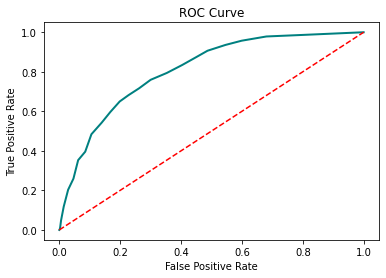

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

**LOGISTIC REGRESSION**

In [67]:
param_grid = {'solver': ['lbfgs', 'liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10]}
lr = LogisticRegression()
grid = GridSearchCV(lr, param_grid=param_grid, cv=10, scoring='accuracy')
gs = grid.fit(X_train, y_train)
print(f'best parameters: {gs.best_params_} with score: {gs.best_score_}')

best parameters: {'C': 10, 'solver': 'lbfgs'} with score: 0.8040862056977426


In [ ]:
lr = LogisticRegression(random_state=20)
lr.fit(X_train, y_train)
weights = pd.Series(lr.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind='bar')
#print(lr.coef_[0])

In [99]:
lr = LogisticRegression(C=10, solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)
roc_auc_score(y_test,y_pred_proba[:,1])

0.8352560684574807

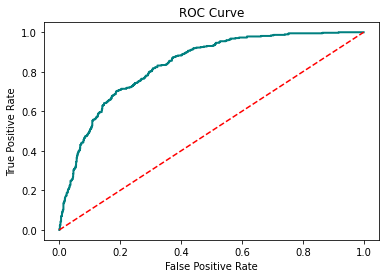

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

**SUPPORT VECTOR MACHINE**

In [70]:
param_range = [0.001, 0.01, 0.1, 1, 10]
param_grid = [{'C': param_range, 'kernel': ['linear']}, {'C': param_range, 'gamma': param_range,'kernel': ['rbf']}]
svc = SVC()
grid = GridSearchCV(svc, param_grid=param_grid, cv=10, scoring='accuracy')
gs = grid.fit(X_train, y_train)
print(f'best parameters: {gs.best_params_} with score: {gs.best_score_}')

best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} with score: 0.8026630342028913


In [ ]:
a = pd.DataFrame(gs.cv_results_)[['param_C','param_kernel','param_gamma','mean_test_score', 'mean_fit_time']]

In [94]:
svc = SVC(C=1, gamma=0.01, kernel='rbf', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred_proba = svc.predict_proba(X_test)
roc_auc_score(y_test,y_pred_proba[:,1])

0.8123411381625607

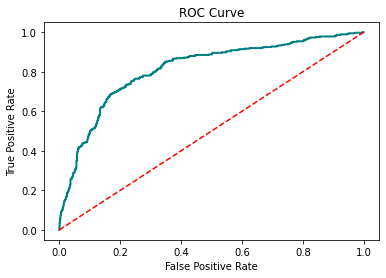

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

**RANDOM FOREST**

In [76]:
param_grid = {'n_estimators': [100, 200, 300, 400]}
rf = RandomForestClassifier()
grid = GridSearchCV(rf, param_grid=param_grid, cv=10, scoring='accuracy')
gs = grid.fit(X_train, y_train)
print(f'best parameters: {gs.best_params_} with score: {gs.best_score_}')

best parameters: {'n_estimators': 400} with score: 0.793767501248396


<AxesSubplot:>

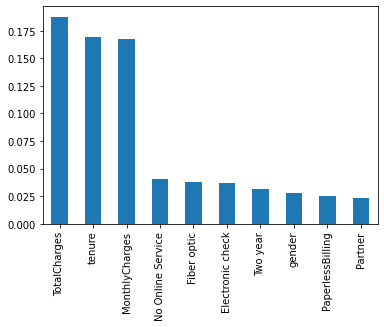

In [83]:
rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns.values)
importances.sort_values(ascending = False)[:10].plot(kind='bar')

In [97]:
rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
roc_auc_score(y_test,y_pred_proba[:,1])

0.8185493681763826

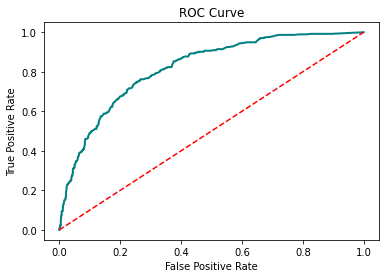

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

<AxesSubplot:>

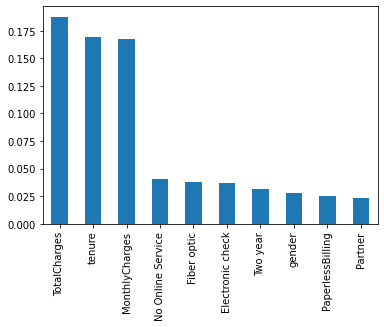

In [ ]:
rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns.values)
importances.sort_values(ascending = False)[:10].plot(kind='bar')

In [ ]:
rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
roc_auc_score(y_test,y_pred_proba[:,1])

0.8185493681763826

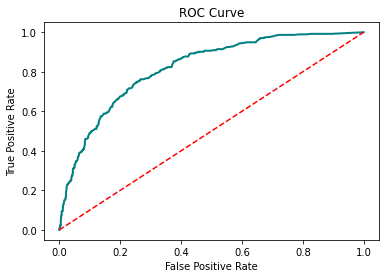

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()